In [3]:
from simulation import stock_sim
from nn_train import NN_train
from nn_price import NN_price
from plots import NN_plot

## Libraries
import time
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import tensorflow as tf

**LSM with a sequence of neural networks**

1-dimensional Basket Put

In [ ]:
bput1 = {'dim': 1, 'K': 40, 'x0': np.repeat(40, 1), 'sigma': np.repeat(0.2,1), 
         'r': 0.05, 'div': 0, 'T': 1, 'dt': 0.05, 'payoff.func': 'put.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, bput1)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, bput1, theta = 'average', \
                    net = 'seq', epoch_num = 25, display_time=True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, bput1)
val = NN_price(stockFwd, NNet, c_in, c_out, bput1, net = 'seq')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 19  Time = 78.71 sec
Step i = 18  Time = 97.13 sec
Step i = 17  Time = 98.82 sec
Step i = 16  Time = 99.02 sec
Step i = 15  Time = 76.81 sec
Step i = 14  Time = 81.21 sec
Step i = 13  Time = 98.72 sec
Step i = 12  Time = 80.92 sec
Step i = 11  Time = 96.95 sec
Step i = 10  Time = 82.06 sec
Step i = 9  Time = 98.87 sec
Step i = 8  Time = 98.81 sec
Step i = 7  Time = 98.81 sec
Step i = 6  Time = 80.35 sec
Step i = 5  Time = 80.78 sec
Step i = 4  Time = 82.25 sec
Step i = 3  Time = 97.12 sec
Step i = 2  Time = 98.88 sec
Step i = 1  Time = 85.32 sec
Price = 2.4076044543051163
Total Time = 1900.77 sec


Boundary Plot

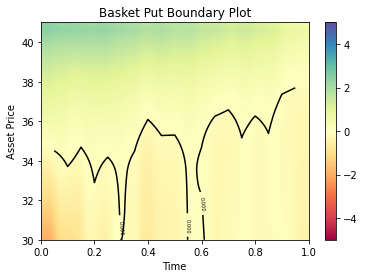

In [ ]:
(x,y,z) = NN_plot(NNet, c_in, c_out, bput1, net = 'seq', display_time = False)

norm_put = matplotlib.colors.Normalize(vmin=-5, vmax=5)
contour = plt.contour(x, y, z, [0], colors='black')
plt.clabel(contour, inline=True, fontsize=5)
plt.imshow(np.array(z, dtype = float), extent=[0, 1, 30, 41],  aspect='auto', \
           origin='lower', cmap='Spectral', norm = norm_put, alpha=1)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Basket Put Boundary Plot')
plt.savefig('BasketPutBoundary.png', dpi=1000)

2-dimensional Basket Put

In [ ]:
bput2 = {'dim': 2, 'K': 40, 'x0': np.repeat(40, 2), 'sigma': np.repeat(0.2,2), 
         'r': 0.06, 'div': 0, 'T': 1, 'dt': 0.04, 'payoff.func': 'put.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, bput2)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, bput2, theta = 'average', \
                                net = 'seq', epoch_num = 25, display_time = True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, bput2)
val  = NN_price(stockFwd, NNet, c_in, c_out, bput2, net = 'seq')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 24  Time = 98.97 sec
Step i = 23  Time = 97.57 sec
Step i = 22  Time = 97.49 sec
Step i = 21  Time = 99.94 sec
Step i = 20  Time = 71.14 sec
Step i = 19  Time = 99.37 sec
Step i = 18  Time = 97.61 sec
Step i = 17  Time = 78.93 sec
Step i = 16  Time = 73.26 sec
Step i = 15  Time = 72.91 sec
Step i = 14  Time = 73.47 sec
Step i = 13  Time = 98.99 sec
Step i = 12  Time = 97.68 sec
Step i = 11  Time = 75.86 sec
Step i = 10  Time = 99.04 sec
Step i = 9  Time = 77.15 sec
Step i = 8  Time = 80.63 sec
Step i = 7  Time = 80.54 sec
Step i = 6  Time = 92.71 sec
Step i = 5  Time = 99.17 sec
Step i = 4  Time = 81.12 sec
Step i = 3  Time = 79.43 sec
Step i = 2  Time = 98.76 sec
Step i = 1  Time = 83.99 sec
Price = 1.456617073506295
Total Time = 2354.45 sec


Contour Plot

In [ ]:
norm_put_cont = matplotlib.colors.Normalize(vmin=-3.5, vmax=3.5)
nSteps = int(bput2['T']/bput2['dt'])
contours = []
for i in [0, 6, 15, 23]:
    start_time = time.time()
    (x,y,z) = NN_plot(NNet, c_in, c_out, bput2, net = 'seq', step = i)
    
    contours.append(plt.contour(x, y, z, [0], colors='black'))
    plt.clabel(contours[-1], inline=True, fontsize=10)
    plt.imshow(np.array(z, dtype = float), extent=[32.5, 45, 32.5, 45], \
               origin='lower', cmap='Spectral', norm = norm_put_cont, alpha=1)
    plt.colorbar()
    plt.xlabel('Asset Price 1')
    plt.ylabel('Asset Price 2')
    plt.title('Basket Put Contour Map at Step '+str(i+1))
    plt.savefig('BasketPutContourMap'+str(i+1)+'.png', dpi=1000)
    plt.clf()
    print('Step i =',i+1,'Time =', np.round(time.time()-start_time,2), 'sec')

Step i = 1 Time = 9.17 sec
Step i = 7 Time = 7.04 sec
Step i = 16 Time = 9.11 sec
Step i = 24 Time = 9.15 sec


<Figure size 432x288 with 0 Axes>

2-dimensional Max-Call

In [ ]:
mcall2 = {'dim': 2, 'K': 100, 'x0': np.repeat(100, 2), 'sigma': np.repeat(0.2,2), 
         'r': 0.05, 'div': 0, 'T': 1, 'dt': 0.05, 'payoff.func': 'maxi.call.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, mcall2)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, mcall2, theta = 'average', \
                                net = 'seq', epoch_num = 25, display_time=True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, mcall2)
val  = NN_price(stockFwd, NNet, c_in, c_out, mcall2, net = 'seq')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 19  Time = 156.4 sec
Step i = 18  Time = 158.13 sec
Step i = 17  Time = 157.24 sec
Step i = 16  Time = 158.3 sec
Step i = 15  Time = 157.03 sec
Step i = 14  Time = 158.13 sec
Step i = 13  Time = 157.17 sec
Step i = 12  Time = 139.14 sec
Step i = 11  Time = 158.28 sec
Step i = 10  Time = 156.78 sec
Step i = 9  Time = 157.69 sec
Step i = 8  Time = 141.87 sec
Step i = 7  Time = 135.81 sec
Step i = 6  Time = 137.76 sec
Step i = 5  Time = 158.42 sec
Step i = 4  Time = 138.81 sec
Step i = 3  Time = 140.56 sec
Step i = 2  Time = 137.31 sec
Step i = 1  Time = 157.97 sec
Price = 17.242498891351275
Total Time = 3074.02 sec


Contour Plot

In [ ]:
norm_max = matplotlib.colors.Normalize(vmin=-20, vmax=20)
nSteps = int(mcall2['T']/mcall2['dt'])
contours = []
for i in [0, 6, 12, 18]:
    start_time = time.time()
    (x,y,z) = NN_plot(NNet, c_in, c_out, mcall2, net = 'seq', step = i, display_time = False)
    
    contours.append(plt.contour(x, y, z, [0], colors='black'))
    plt.clabel(contours[-1], inline=True, fontsize=10)
    plt.imshow(np.array(z, dtype = float), extent=[60, 140, 60, 140], \
               origin='lower', cmap='Spectral', norm = norm_max, alpha=1)
    plt.colorbar()
    plt.xlabel('Price of Asset 1')
    plt.ylabel('Price of Asset 2')
    plt.title('Max Call Contour Map at Step '+str(i+1))
    plt.savefig('MaxCallMap'+str(i+1)+'.png', dpi=1000)
    plt.clf()
    print('Step i =',i+1,'Time =', np.round(time.time()-start_time,2), 'sec')

Step i = 1 Time = 25.74 sec
Step i = 7 Time = 25.92 sec
Step i = 13 Time = 46.04 sec
Step i = 19 Time = 24.97 sec


<Figure size 432x288 with 0 Axes>

3-dimensional Max-Call

In [ ]:
mcall3 = {'dim': 3, 'K': 100, 'x0': np.repeat(90, 3), 'sigma': np.repeat(0.2,3), 
         'r': 0.05, 'div': 0.1, 'T': 3, 'dt': 1/3, 'payoff.func': 'maxi.call.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, mcall3)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, mcall3, theta = 'average', \
                                net = 'seq', epoch_num = 25, display_time = True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, mcall3)
val  = NN_price(stockFwd, NNet, c_in, c_out, mcall3, net = 'seq')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 8  Time = 89.94 sec
Step i = 7  Time = 93.91 sec
Step i = 6  Time = 96.58 sec
Step i = 5  Time = 97.68 sec
Step i = 4  Time = 89.52 sec
Step i = 3  Time = 85.71 sec
Step i = 2  Time = 97.41 sec
Step i = 1  Time = 69.05 sec
Price = 11.15545527309976
Total Time = 806.89 sec


5-dimensional Max-Call

In [ ]:
mcall5 = {'dim': 5, 'K': 100, 'x0': np.repeat(70, 5), 
         'sigma': np.array([0.08,0.16,0.24,0.32,0.4]), 
         'r': 0.05, 'div': 0.1, 'T': 3, 'dt': 1/3, 
         'payoff.func': 'maxi.call.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, mcall5)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, mcall5, theta = 'average', \
                            net = 'seq', epoch_num = 25, display_time = True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, mcall5)
val  = NN_price(stockFwd, NNet, c_in, c_out, mcall5, net = 'seq')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 8  Time = 99.3 sec
Step i = 7  Time = 68.74 sec
Step i = 6  Time = 63.71 sec
Step i = 5  Time = 63.71 sec
Step i = 4  Time = 58.81 sec
Step i = 3  Time = 56.1 sec
Step i = 2  Time = 57.09 sec
Step i = 1  Time = 25.25 sec
Price = 11.542052004824733
Total Time = 590.25 sec


**LSM with a single neural network**

1-dimensional Basket Put

In [ ]:
# Catastrophic Forgetting

bput1 = {'dim': 1, 'K': 40, 'x0': np.repeat(40, 1), 'sigma': np.repeat(0.2,1), 
         'r': 0.05, 'div': 0, 'T': 1, 'dt': 0.05, 'payoff.func': 'put.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, bput1)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, bput1, \
                    net = 'single', epoch_num = 25, display_time=True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, bput1)
val = NN_price(stockFwd, NNet, c_in, c_out, bput1, net = 'single')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 19  Time = 79.05 sec
Step i = 18  Time = 80.12 sec
Step i = 17  Time = 97.42 sec
Step i = 16  Time = 83.97 sec
Step i = 15  Time = 97.5 sec
Step i = 14  Time = 97.43 sec
Step i = 13  Time = 98.43 sec
Step i = 12  Time = 86.54 sec
Step i = 11  Time = 97.84 sec
Step i = 10  Time = 109.1 sec
Step i = 9  Time = 104.95 sec
Step i = 8  Time = 107.53 sec
Step i = 7  Time = 99.14 sec
Step i = 6  Time = 91.87 sec
Step i = 5  Time = 98.97 sec
Step i = 4  Time = 108.75 sec
Step i = 3  Time = 104.45 sec
Step i = 2  Time = 99.11 sec
Step i = 1  Time = 98.9 sec
Price = 2.3263949975483404
Total Time = 2054.33 sec


Boundary Plot -- Catastrophic Forgetting

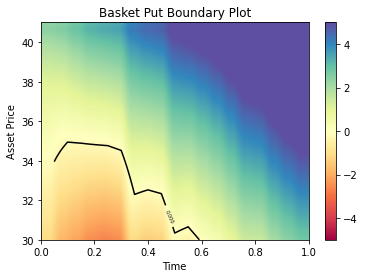

In [ ]:
# Catastrophic Forgetting

(x,y,z) = NN_plot(NNet, c_in, c_out, bput1, net = 'single', display_time = False)

norm_put = matplotlib.colors.Normalize(vmin=-5, vmax=5)
contour = plt.contour(x, y, z, [0], colors='black')
plt.clabel(contour, inline=True, fontsize=5)
plt.imshow(np.array(z, dtype = float), extent=[0, 1, 30, 41],  aspect='auto', \
           origin='lower', cmap='Spectral', norm = norm_put, alpha=1)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Basket Put Boundary Plot')
plt.savefig('BasketPutBoundaryForgetting.png', dpi=1000)

Mitigation of Catastrophic Forgetting

In [ ]:
# Partially Mitigated Catastrophic Forgetting

bput1 = {'dim': 1, 'K': 40, 'x0': np.repeat(40, 1), 'sigma': np.repeat(0.2,1), 
         'r': 0.05, 'div': 0, 'T': 1, 'dt': 0.05, 'payoff.func': 'put.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, bput1)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, bput1, ratio = 2,\
                    net = 'single', epoch_num = 25, display_time=True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, bput1)
val = NN_price(stockFwd, NNet, c_in, c_out, bput1, net = 'single')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 19  Time = 99.77 sec
Step i = 18  Time = 144.75 sec
Step i = 17  Time = 217.14 sec
Step i = 16  Time = 217.69 sec
Step i = 15  Time = 217.91 sec
Step i = 14  Time = 218.31 sec
Step i = 13  Time = 218.15 sec
Step i = 12  Time = 216.15 sec
Step i = 11  Time = 218.33 sec
Step i = 10  Time = 218.71 sec
Step i = 9  Time = 218.09 sec
Step i = 8  Time = 220.21 sec
Step i = 7  Time = 219.08 sec
Step i = 6  Time = 279.19 sec
Step i = 5  Time = 221.6 sec
Step i = 4  Time = 279.36 sec
Step i = 3  Time = 227.76 sec
Step i = 2  Time = 280.0 sec
Step i = 1  Time = 231.17 sec
Price = 2.4010487704822143
Total Time = 4359.22 sec


Boundary Plot -- Mitigation of Catastrophic Forgetting

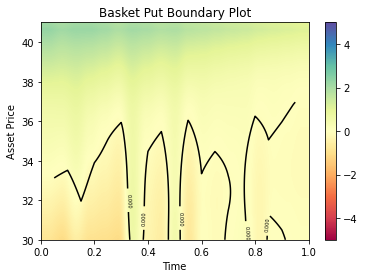

In [ ]:
# Partially Mitigated Catastrophic Forgetting

(x,y,z) = NN_plot(NNet, c_in, c_out, bput1, net = 'single', display_time = False)

norm_put = matplotlib.colors.Normalize(vmin=-5, vmax=5)
contour = plt.contour(x, y, z, [0], colors='black')
plt.clabel(contour, inline=True, fontsize=5)
plt.imshow(np.array(z, dtype = float), extent=[0, 1, 30, 41],  aspect='auto', \
           origin='lower', cmap='Spectral', norm = norm_put, alpha=1)
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.title('Basket Put Boundary Plot')
plt.savefig('BasketPutBoundaryMCF.png', dpi=1000)

2-dimensional Basket Put

In [8]:
# Catastrophic Forgetting

bput2 = {'dim': 2, 'K': 40, 'x0': np.repeat(40, 2), 'sigma': np.repeat(0.2,2), 
         'r': 0.06, 'div': 0, 'T': 1, 'dt': 0.04, 'payoff.func': 'put.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, bput2)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, bput2, \
                                net = 'single', epoch_num = 25, display_time = True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, bput2)
val  = NN_price(stockFwd, NNet, c_in, c_out, bput2, net = 'single')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 24  Time = 75.23 sec
Step i = 23  Time = 73.07 sec
Step i = 22  Time = 98.95 sec
Step i = 21  Time = 81.91 sec
Step i = 20  Time = 72.63 sec
Step i = 19  Time = 73.66 sec
Step i = 18  Time = 98.84 sec
Step i = 17  Time = 73.13 sec
Step i = 16  Time = 98.83 sec
Step i = 15  Time = 76.23 sec
Step i = 14  Time = 75.55 sec
Step i = 13  Time = 76.46 sec
Step i = 12  Time = 77.14 sec
Step i = 11  Time = 77.46 sec
Step i = 10  Time = 76.88 sec
Step i = 9  Time = 98.5 sec
Step i = 8  Time = 99.07 sec
Step i = 7  Time = 83.57 sec
Step i = 6  Time = 82.04 sec
Step i = 5  Time = 99.26 sec
Step i = 4  Time = 98.63 sec
Step i = 3  Time = 97.74 sec
Step i = 2  Time = 85.0 sec
Step i = 1  Time = 98.26 sec
Price = 1.3193738081400763
Total Time = 2296.32 sec


Contour Plot -- Catastrophic Forgetting

In [9]:
# Catastrophic Forgetting

norm_put_cont = matplotlib.colors.Normalize(vmin=-3.5, vmax=3.5)
nSteps = int(bput2['T']/bput2['dt'])
contours = []
for i in [0, 6, 15, 23]:
    start_time = time.time()
    (x,y,z) = NN_plot(NNet, c_in, c_out, bput2, net = 'single', step = i)
    
    contours.append(plt.contour(x, y, z, [0], colors='black'))
    plt.clabel(contours[-1], inline=True, fontsize=10)
    plt.imshow(np.array(z, dtype = float), extent=[32.5, 45, 32.5, 45], \
               origin='lower', cmap='Spectral', norm = norm_put_cont, alpha=1)
    plt.colorbar()
    plt.xlabel('Asset Price 1')
    plt.ylabel('Asset Price 2')
    plt.title('Basket Put Contour Map at Step '+str(i+1))
    plt.savefig('BasketPutContourForgettingMap'+str(i+1)+'.png', dpi=1000)
    plt.clf()
    print('Step i =',i+1,'Time =', np.round(time.time()-start_time,2), 'sec')

Step i = 1 Time = 9.68 sec
Step i = 7 Time = 9.3 sec
Step i = 16 Time = 9.3 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


Step i = 24 Time = 9.29 sec


<Figure size 432x288 with 0 Axes>

Mitigation of Catastrophic Forgetting

In [4]:
# Partially Mitigated Catastrophic Forgetting

bput2 = {'dim': 2, 'K': 40, 'x0': np.repeat(40, 2), 'sigma': np.repeat(0.2,2), 
         'r': 0.06, 'div': 0, 'T': 1, 'dt': 0.04, 'payoff.func': 'put.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, bput2)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, bput2, ratio = 2,\
                                net = 'single', epoch_num = 25, display_time = True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, bput2)
val  = NN_price(stockFwd, NNet, c_in, c_out, bput2, net = 'single')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 24  Time = 75.62 sec
Step i = 23  Time = 158.6 sec
Step i = 22  Time = 170.96 sec
Step i = 21  Time = 174.11 sec
Step i = 20  Time = 217.8 sec
Step i = 19  Time = 176.99 sec
Step i = 18  Time = 219.41 sec
Step i = 17  Time = 178.66 sec
Step i = 16  Time = 218.04 sec
Step i = 15  Time = 217.91 sec
Step i = 14  Time = 180.74 sec
Step i = 13  Time = 184.34 sec
Step i = 12  Time = 220.29 sec
Step i = 11  Time = 186.92 sec
Step i = 10  Time = 219.03 sec
Step i = 9  Time = 191.47 sec
Step i = 8  Time = 220.9 sec
Step i = 7  Time = 221.21 sec
Step i = 6  Time = 219.72 sec
Step i = 5  Time = 221.46 sec
Step i = 4  Time = 203.63 sec
Step i = 3  Time = 206.81 sec
Step i = 2  Time = 221.93 sec
Step i = 1  Time = 217.87 sec
Price = 1.4394943418532051
Total Time = 4970.64 sec


Contour Plot -- Mitigation of Catastrophic Forgetting

In [7]:
# Partially Mitigated Catastrophic Forgetting

norm_put_cont = matplotlib.colors.Normalize(vmin=-3.5, vmax=3.5)
nSteps = int(bput2['T']/bput2['dt'])
contours = []
for i in [0, 6, 15, 23]:
    start_time = time.time()
    (x,y,z) = NN_plot(NNet, c_in, c_out, bput2, net = 'single', step = i)
    
    contours.append(plt.contour(x, y, z, [0], colors='black'))
    plt.clabel(contours[-1], inline=True, fontsize=10)
    plt.imshow(np.array(z, dtype = float), extent=[32.5, 45, 32.5, 45], \
               origin='lower', cmap='Spectral', norm = norm_put_cont, alpha=1)
    plt.colorbar()
    plt.xlabel('Asset Price 1')
    plt.ylabel('Asset Price 2')
    plt.title('Basket Put Contour Map at Step '+str(i+1))
    plt.savefig('BasketPutContourMCFMap'+str(i+1)+'.png', dpi=1000)
    plt.clf()
    print('Step i =',i+1,'Time =', np.round(time.time()-start_time,2), 'sec')

Step i = 1 Time = 9.72 sec
Step i = 7 Time = 9.32 sec
Step i = 16 Time = 9.96 sec
Step i = 24 Time = 15.15 sec


<Figure size 432x288 with 0 Axes>

2-dimensional Max-Call

In [ ]:
# Catastrophic Forgetting

mcall2 = {'dim': 2, 'K': 100, 'x0': np.repeat(100, 2), 'sigma': np.repeat(0.2,2), 
         'r': 0.05, 'div': 0, 'T': 1, 'dt': 0.05, 'payoff.func': 'maxi.call.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, mcall2)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, mcall2, \
                                net = 'single', epoch_num = 25, display_time=True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, mcall2)
val  = NN_price(stockFwd, NNet, c_in, c_out, mcall2, net = 'single')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 19  Time = 129.73 sec
Step i = 18  Time = 157.38 sec
Step i = 17  Time = 128.59 sec
Step i = 16  Time = 128.99 sec
Step i = 15  Time = 156.46 sec
Step i = 14  Time = 157.85 sec
Step i = 13  Time = 131.63 sec
Step i = 12  Time = 130.05 sec
Step i = 11  Time = 128.23 sec
Step i = 10  Time = 127.61 sec
Step i = 9  Time = 126.3 sec
Step i = 8  Time = 156.39 sec
Step i = 7  Time = 156.12 sec
Step i = 6  Time = 157.32 sec
Step i = 5  Time = 125.78 sec
Step i = 4  Time = 126.24 sec
Step i = 3  Time = 124.54 sec
Step i = 2  Time = 123.85 sec
Step i = 1  Time = 157.32 sec
Price = 13.101762502216689
Total Time = 2825.69 sec


Contour Plot -- Catastrophic Forgetting

In [ ]:
# Catastrophic Forgetting

norm_max = matplotlib.colors.Normalize(vmin=-20, vmax=20)
nSteps = int(mcall2['T']/mcall2['dt'])
contours = []
for i in [0, 6, 12, 18]:
    start_time = time.time()
    (x,y,z) = NN_plot(NNet, c_in, c_out, mcall2, net = 'single', step = i, display_time = False)
    
    contours.append(plt.contour(x, y, z, [0], colors='black'))
    plt.clabel(contours[-1], inline=True, fontsize=10)
    plt.imshow(np.array(z, dtype = float), extent=[60, 140, 60, 140], \
               origin='lower', cmap='Spectral', norm = norm_max, alpha=1)
    plt.colorbar()
    plt.xlabel('Price of Asset 1')
    plt.ylabel('Price of Asset 2')
    plt.title('Max Call Contour Map at Step '+str(i+1))
    plt.savefig('MaxCallContourForgettingMap'+str(i+1)+'.png', dpi=1000)
    plt.clf()
    print('Step i =',i+1,'Time =', np.round(time.time()-start_time,2), 'sec')

Step i = 1 Time = 24.94 sec
Step i = 7 Time = 45.33 sec
Step i = 13 Time = 24.83 sec
Step i = 19 Time = 24.09 sec


<Figure size 432x288 with 0 Axes>

Mitigation of Catastrophic Forgetting

In [ ]:
# Partially Mitigated Catastrophic Forgetting

mcall2 = {'dim': 2, 'K': 100, 'x0': np.repeat(100, 2), 'sigma': np.repeat(0.2,2), 
         'r': 0.05, 'div': 0, 'T': 1, 'dt': 0.05, 'payoff.func': 'maxi.call.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, mcall2)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, mcall2, ratio = 2, \
                                net = 'single', epoch_num = 25, display_time=True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, mcall2)
val  = NN_price(stockFwd, NNet, c_in, c_out, mcall2, net = 'single')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 19  Time = 156.36 sec
Step i = 18  Time = 242.18 sec
Step i = 17  Time = 356.37 sec
Step i = 16  Time = 397.14 sec
Step i = 15  Time = 398.66 sec
Step i = 14  Time = 397.21 sec
Step i = 13  Time = 399.12 sec
Step i = 12  Time = 354.03 sec
Step i = 11  Time = 351.87 sec
Step i = 10  Time = 398.55 sec
Step i = 9  Time = 353.78 sec
Step i = 8  Time = 398.9 sec
Step i = 7  Time = 399.14 sec
Step i = 6  Time = 349.64 sec
Step i = 5  Time = 401.32 sec
Step i = 4  Time = 349.88 sec
Step i = 3  Time = 352.14 sec
Step i = 2  Time = 349.88 sec
Step i = 1  Time = 349.93 sec
Price = 16.9260680303906
Total Time = 6949.01 sec


Contour Plot -- Mitigation of Catastrophic Forgetting

In [ ]:
# Partially Mitigated Catastrophic Forgetting

norm_max = matplotlib.colors.Normalize(vmin=-20, vmax=20)
nSteps = int(mcall2['T']/mcall2['dt'])
contours = []
for i in [0, 6, 12, 18]:
    start_time = time.time()
    (x,y,z) = NN_plot(NNet, c_in, c_out, mcall2, net = 'single', step = i, display_time = False)
    
    contours.append(plt.contour(x, y, z, [0], colors='black'))
    plt.clabel(contours[-1], inline=True, fontsize=10)
    plt.imshow(np.array(z, dtype = float), extent=[60, 140, 60, 140], \
               origin='lower', cmap='Spectral', norm = norm_max, alpha=1)
    plt.colorbar()
    plt.xlabel('Price of Asset 1')
    plt.ylabel('Price of Asset 2')
    plt.title('Max Call Contour Map at Step '+str(i+1))
    plt.savefig('MaxCallContourMCFMap'+str(i+1)+'.png', dpi=1000)
    plt.clf()
    print('Step i =',i+1,'Time =', np.round(time.time()-start_time,2), 'sec')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


Step i = 1 Time = 23.38 sec
Step i = 7 Time = 23.29 sec
Step i = 13 Time = 24.8 sec
Step i = 19 Time = 23.38 sec


<Figure size 432x288 with 0 Axes>

3-dimensional Max-Call

In [ ]:
# Catastrophic Forgetting

mcall3 = {'dim': 3, 'K': 100, 'x0': np.repeat(90, 3), 'sigma': np.repeat(0.2,3), 
         'r': 0.05, 'div': 0.1, 'T': 3, 'dt': 1/3, 'payoff.func': 'maxi.call.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, mcall3)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, mcall3, \
                                net = 'single', epoch_num = 25, display_time = True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, mcall3)
val  = NN_price(stockFwd, NNet, c_in, c_out, mcall3, net = 'single')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 8  Time = 77.73 sec
Step i = 7  Time = 81.09 sec
Step i = 6  Time = 80.91 sec
Step i = 5  Time = 82.34 sec
Step i = 4  Time = 95.48 sec
Step i = 3  Time = 79.58 sec
Step i = 2  Time = 97.08 sec
Step i = 1  Time = 95.36 sec
Price = 10.149606066718778
Total Time = 774.71 sec


In [ ]:
# Partially Mitigated Catastrophic Forgetting 

mcall3 = {'dim': 3, 'K': 100, 'x0': np.repeat(90, 3), 'sigma': np.repeat(0.2,3), 
         'r': 0.05, 'div': 0.1, 'T': 3, 'dt': 1/3, 'payoff.func': 'maxi.call.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, mcall3)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, mcall3, ratio = 2, \
                                net = 'single', epoch_num = 25, display_time = True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, mcall3)
val  = NN_price(stockFwd, NNet, c_in, c_out, mcall3, net = 'single')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 8  Time = 97.62 sec
Step i = 7  Time = 155.38 sec
Step i = 6  Time = 211.86 sec
Step i = 5  Time = 216.28 sec
Step i = 4  Time = 276.31 sec
Step i = 3  Time = 218.05 sec
Step i = 2  Time = 201.8 sec
Step i = 1  Time = 216.65 sec
Price = 10.908426990422134
Total Time = 1673.3 sec


5-dimensional Max-Call

In [ ]:
# Catastrophic Forgetting

mcall5 = {'dim': 5, 'K': 100, 'x0': np.repeat(70, 5), 
         'sigma': np.array([0.08,0.16,0.24,0.32,0.4]), 
         'r': 0.05, 'div': 0.1, 'T': 3, 'dt': 1/3, 
         'payoff.func': 'maxi.call.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, mcall5)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, mcall5, \
                            net = 'single', epoch_num = 25, display_time = True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, mcall5)
val  = NN_price(stockFwd, NNet, c_in, c_out, mcall5, net = 'single')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 8  Time = 61.13 sec
Step i = 7  Time = 57.91 sec
Step i = 6  Time = 56.62 sec
Step i = 5  Time = 52.51 sec
Step i = 4  Time = 50.26 sec
Step i = 3  Time = 55.88 sec
Step i = 2  Time = 55.73 sec
Step i = 1  Time = 23.43 sec
Price = 10.330187244260783
Total Time = 498.95 sec


In [ ]:
# Partially Mitigated Catastrophic Forgetting 

mcall5 = {'dim': 5, 'K': 100, 'x0': np.repeat(70, 5), 
         'sigma': np.array([0.08,0.16,0.24,0.32,0.4]), 
         'r': 0.05, 'div': 0.1, 'T': 3, 'dt': 1/3, 
         'payoff.func': 'maxi.call.payoff'}

start_time = time.time()
np.random.seed(15)
tf.random.set_seed(15)
stock = stock_sim(300000, mcall5)
(v_train, stop, NNet, c_in, c_out) = NN_train(stock, mcall5, ratio = 2, \
                            net = 'single', epoch_num = 25, display_time = True)

np.random.seed(16)
tf.random.set_seed(16)
stockFwd = stock_sim(300000, mcall5)
val  = NN_price(stockFwd, NNet, c_in, c_out, mcall5, net = 'single')
print('Price =', val)
print('Total Time =', np.round(time.time()-start_time, 2),'sec')

Step i = 8  Time = 57.75 sec
Step i = 7  Time = 100.59 sec
Step i = 6  Time = 141.97 sec
Step i = 5  Time = 155.77 sec
Step i = 4  Time = 120.95 sec
Step i = 3  Time = 103.21 sec
Step i = 2  Time = 80.27 sec
Step i = 1  Time = 56.45 sec
Price = 11.14029439459517
Total Time = 898.53 sec
